In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from labspace import singleTransfer
import pandas as pd

###
example_prefix = 'examples'

def run_full_styleTransfer(input_image_prefix, ref_image_prefix):
    print(input_image_prefix, ref_image_prefix)
    inputImg=(cv2.imread("../data/inputs/"+example_prefix+"/"+input_image_prefix+".png",cv2.IMREAD_COLOR))
    inputImg= np.float32(cv2.cvtColor(inputImg, cv2.COLOR_BGR2Lab))

    refImg=(cv2.imread("../data/inputs/"+example_prefix+"/"+ref_image_prefix+".png",cv2.IMREAD_COLOR))
    refImg=np.float32(cv2.cvtColor(refImg, cv2.COLOR_BGR2Lab))

    refImg_bg=np.float32(cv2.imread("../data/inputs/"+example_prefix+"/"+ref_image_prefix+".jpg",cv2.IMREAD_COLOR))

    inputImg_mask = cv2.imread("../data/inputs/"+example_prefix+"/"+input_image_prefix+"_mask.png")

    # refImg_mask = cv2.imread("../data/inputs/example1/2910450431_56f1c774ed_z_mask.png",0)
    style_lm = np.array(pd.read_csv("../data/inputs/"+example_prefix+"/"+ref_image_prefix+".lm", header=None),dtype='float32')
    input_lm = np.array(pd.read_csv("../data/inputs/"+example_prefix+"/"+input_image_prefix+".lm", header=None),dtype='float32')

    ########## Style Transfer ##########
    inputImg_transformed = inputImg.copy()
    m1, m2 = (np.min(inputImg_transformed[:,:,0]), np.max(inputImg_transformed[:,:,0]))
    inputImg_transformed[:,:,0]=singleTransfer(inputImg[:,:,0], refImg[:,:,0], style_lm, input_lm)
    inputImg_transformed[:,:,0] = (inputImg_transformed[:,:,0]-np.min(inputImg_transformed[:,:,0]))*(m2-m1)/(np.max(inputImg_transformed[:,:,0])-np.min(inputImg_transformed[:,:,0])) + m1
    inputImg_transformed_u8 = inputImg_transformed.astype('uint8')
    inputImg_transformed_u8_rgb = cv2.cvtColor(inputImg_transformed_u8.copy(), cv2.COLOR_Lab2RGB)

    ### background replacement
    inputImg_mask = inputImg_mask/255
    tempOut = np.float32(inputImg_transformed_u8_rgb)
    outImg = inputImg_mask*tempOut + (1-inputImg_mask)*refImg_bg
    outImg = outImg.astype('uint8')
    outImg = cv2.cvtColor(outImg, cv2.COLOR_BGR2GRAY)
    outImg = cv2.cvtColor(outImg, cv2.COLOR_GRAY2RGB)

    # cv2.imwrite('../outputs/style_transfered_output.png',outImg)

    ###### plotting outputs
    refImgrgb=cv2.cvtColor(refImg.astype(np.uint8),cv2.COLOR_Lab2RGB)
    inputImgrgb=cv2.cvtColor(inputImg.astype(np.uint8),cv2.COLOR_Lab2RGB)

    return (refImgrgb, outImg, inputImgrgb)


In [2]:
# input_image_prefixes = ['0006_001','0008_002','6146621199_393b622aa2_o','6431431783_2b07a4f6fa_o']
# ref_image_prefixes = ['3283580499_569997ef67_z', '2910450431_56f1c774ed_z', '2606298205_31cb5b5caf_z', '2388557829_2700f5a874_z', '0018', '0010']

0006_001 2606298205_31cb5b5caf_z


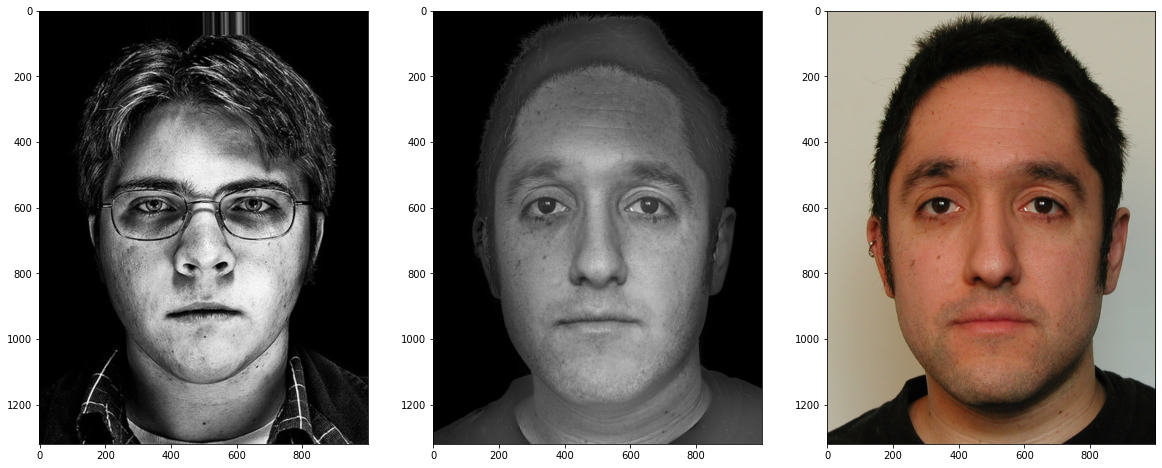

In [5]:
input_image_prefix, ref_image_prefix = ('0006_001','2606298205_31cb5b5caf_z')

#### Full StyleTransfer
refImgrgb_, outImg_, inputImgrgb_ = run_full_styleTransfer(input_image_prefix, ref_image_prefix)

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(refImgrgb_)
fig.add_subplot(1, 3, 2)
plt.imshow(outImg_)
fig.add_subplot(1, 3, 3)
plt.imshow(inputImgrgb_)


0006_001 2910450431_56f1c774ed_z


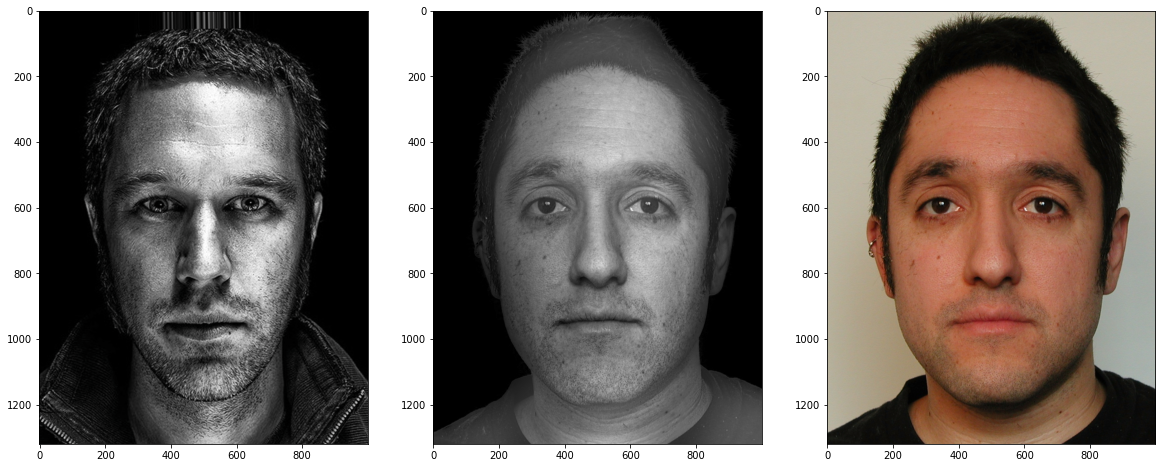

In [6]:
input_image_prefix, ref_image_prefix = ('0006_001','2910450431_56f1c774ed_z')

#### Full StyleTransfer
refImgrgb_, outImg_, inputImgrgb_ = run_full_styleTransfer(input_image_prefix, ref_image_prefix)

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(refImgrgb_)
fig.add_subplot(1, 3, 2)
plt.imshow(outImg_)
fig.add_subplot(1, 3, 3)
plt.imshow(inputImgrgb_)


0006_001 0018


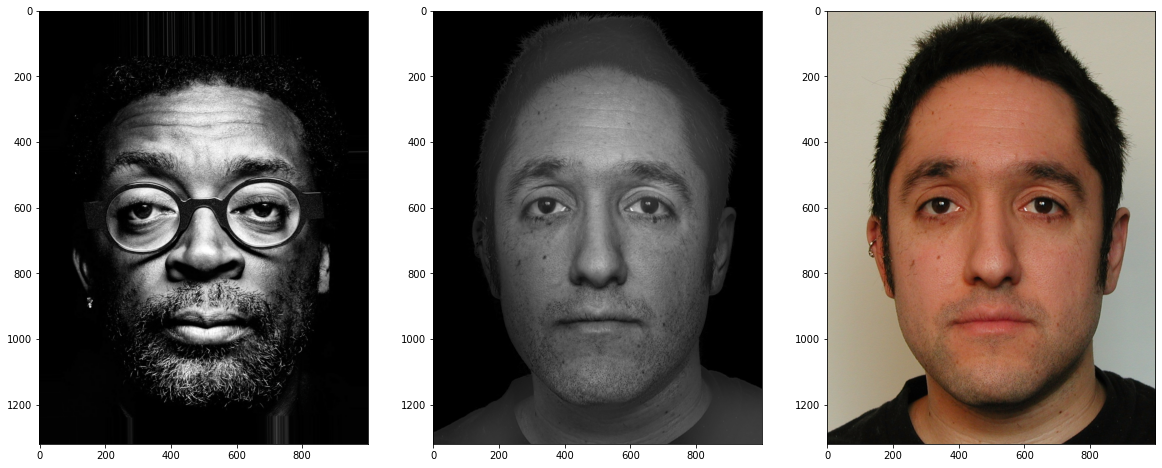

In [3]:
input_image_prefix, ref_image_prefix = ('0006_001','0018')

#### Full StyleTransfer
refImgrgb_, outImg_, inputImgrgb_ = run_full_styleTransfer(input_image_prefix, ref_image_prefix)

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(refImgrgb_)
fig.add_subplot(1, 3, 2)
plt.imshow(outImg_)
fig.add_subplot(1, 3, 3)
plt.imshow(inputImgrgb_)


0008_002 2388557829_2700f5a874_z


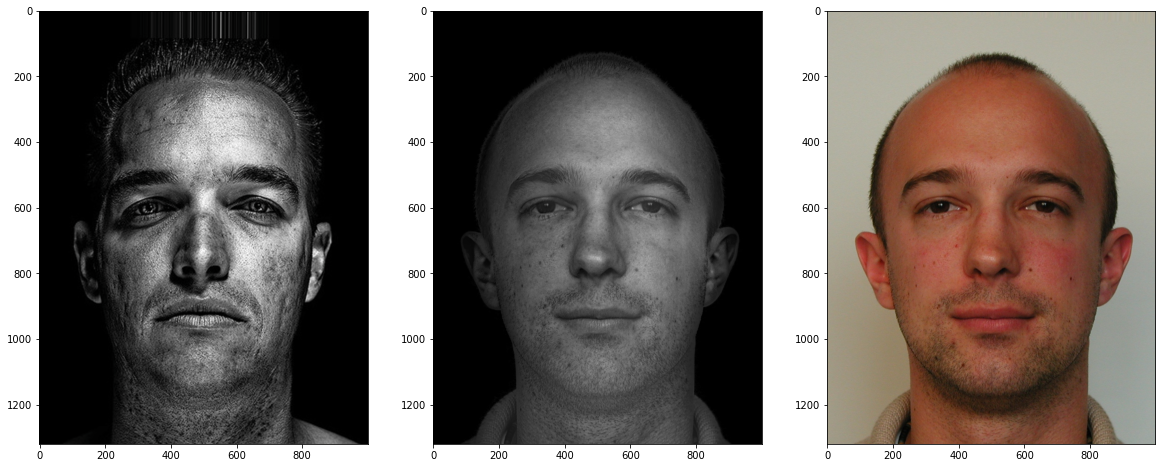

In [8]:
input_image_prefix, ref_image_prefix = ('0008_002','2388557829_2700f5a874_z')

#### Full StyleTransfer
refImgrgb_, outImg_, inputImgrgb_ = run_full_styleTransfer(input_image_prefix, ref_image_prefix)

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(refImgrgb_)
fig.add_subplot(1, 3, 2)
plt.imshow(outImg_)
fig.add_subplot(1, 3, 3)
plt.imshow(inputImgrgb_)


0008_002 2910450431_56f1c774ed_z


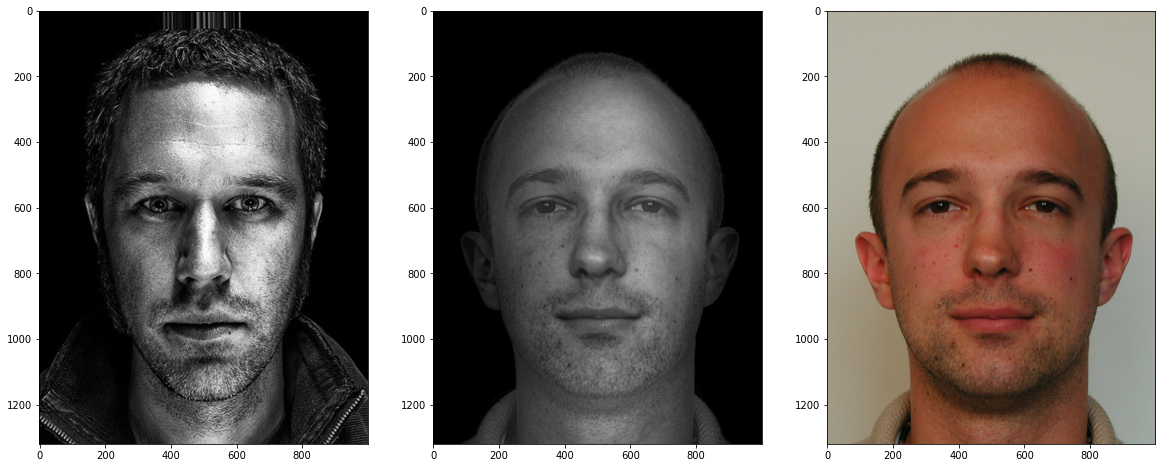

In [9]:
input_image_prefix, ref_image_prefix = ('0008_002','2910450431_56f1c774ed_z')

#### Full StyleTransfer
refImgrgb_, outImg_, inputImgrgb_ = run_full_styleTransfer(input_image_prefix, ref_image_prefix)

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(refImgrgb_)
fig.add_subplot(1, 3, 2)
plt.imshow(outImg_)
fig.add_subplot(1, 3, 3)
plt.imshow(inputImgrgb_)


0008_002 0018


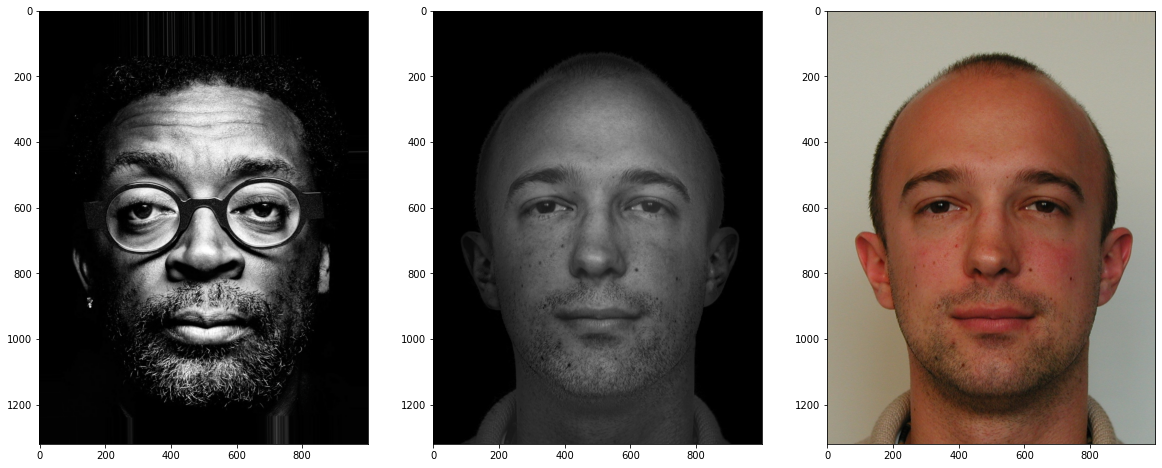

In [7]:
input_image_prefix, ref_image_prefix = ('0008_002','0018')

#### Full StyleTransfer
refImgrgb_, outImg_, inputImgrgb_ = run_full_styleTransfer(input_image_prefix, ref_image_prefix)

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(refImgrgb_)
fig.add_subplot(1, 3, 2)
plt.imshow(outImg_)
fig.add_subplot(1, 3, 3)
plt.imshow(inputImgrgb_)
